The data from this project was retrieved from the website mavenanalytics.io. The data consist of a pipeline of business to business sales from a fictitious company that sells 
computer hardware, including information on accounts, products, sales teams, and sales opportunities.  

In this project, I will demonstrate how to utilize pandas to import the neccessary libraries for performing analysis and reading in the data to a dataframe. I will then clean the data checking for duplicate, unique and null values, as well as extracting the month and day from the date column and extracting the hour from the time column to assing those values their own columns utilizing pandas datetime function. After that is complete, I will perform exploratory data analysis to check for trends and patterns within the data. Finally I will visualize my findings and the answer to the given questions utilizing matplotlib and seaborn.

### QUESTIONS:
1) How is each sales team performing compared to the rest?
2) Are any sales agents lagging behind?
3) Can you identify any quarter-over-quarter trends?
4) Do any products have better win rates?

The first thing that I need to do is import the desired Python libraries to assist in my analysis and answering of the above questions.

In [2]:
import os
import numpy as np
import pandas as pd 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("ggplot")
import seaborn as sns
sns.set_style("darkgrid")

Now that I have all of the libraries that I will utilize for my analysis, I now need to load my data into pandas dataframes which gives me the ability to manipulate the data.

In [3]:
accounts = pd.read_csv(r"C:\Users\mjaso\Downloads\CRM+Sales+Opportunities_PowerBi_Challenge\accounts.csv")
products = pd.read_csv(r"C:\Users\mjaso\Downloads\CRM+Sales+Opportunities_PowerBi_Challenge\products.csv")
sales_pipeline = pd.read_csv(r"C:\Users\mjaso\Downloads\CRM+Sales+Opportunities_PowerBi_Challenge\sales_pipeline.csv")
sales_teams = pd.read_csv(r"C:\Users\mjaso\Downloads\CRM+Sales+Opportunities_PowerBi_Challenge\sales_teams.csv")

The data is now loaded, now I will preview the first and last 3 rows of each dataframe to ensure accuracy and consistency.

I'll start with the 'accounts' dataframe.

In [4]:
accounts.head(3)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN


In [5]:
accounts.tail(3)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
82,Zoomit,entertainment,1992,324.19,978,United States,NaN
83,Zotware,software,1979,4478.47,13809,United States,NaN
84,Zumgoity,medical,1984,441.08,1210,United States,NaN


Now I will preview the 'products' table.

In [7]:
products.head(3)

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55


In [8]:
products.tail(3)

,product,series,sales_price
4,GTX Plus Pro,GTX,5482
5,GTX Plus Basic,GTX,1096
6,GTK 500,GTK,26768


Now the 'sales_pipeline' table.

In [9]:
sales_pipeline.head(3)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0


In [10]:
sales_pipeline.tail(3)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8799,8I5ONXJX,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN


The final dataframe I will preview is the 'sales_team' table.

In [12]:
sales_teams.head(3)

,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central


In [13]:
sales_teams.tail(3)

,sales_agent,manager,regional_office
32,Zane Levy,Summer Sewald,West
33,Maureen Marcano,Summer Sewald,West
34,Carl Lin,Summer Sewald,West


Now that all four of my datasets have been previewed, I will continue to examine the data further. 

I will now check each dataframe for duplicate rows of data.

In [18]:
print(f"The dataframe 'accounts' has {accounts.duplicated().sum()} rows of duplicated data.")

The dataframe 'accounts' has 0 rows of duplicated data.


In [17]:
print(f"The dataframe 'products' has {products.duplicated().sum()} rows of data.")

The dataframe 'products' has 0 rows of data.


In [19]:
print(f"The dataframe 'sales_pipeline' has {sales_pipeline.duplicated().sum()} rows of data.")

The dataframe 'sales_pipeline' has 0 rows of data.


In [20]:
print(f"The dataframe 'sales_teams' has {sales_teams.duplicated().sum()} rows of data.")

The dataframe 'sales_teams' has 0 rows of data.


There are no rows of duplicated data in any of the dataframes, so I will continue on with data examination.

Now I will move on to checking for any null values in each dataframe.

In [21]:
for na in accounts.columns:
    nval = accounts[na].isnull().sum()
    print(f"There are {nval} Null values in the column {na}.")

There are 0 Null values in the column account.
There are 0 Null values in the column sector.
There are 0 Null values in the column year_established.
There are 0 Null values in the column revenue.
There are 0 Null values in the column employees.
There are 0 Null values in the column office_location.
There are 70 Null values in the column subsidiary_of.


There are 70 Null values in the column 'subsidiary_of'. However, there is no need to address that because the column is not important for my analysis.

In [22]:
for na in products.columns:
    nval = products[na].isnull().sum()
    print(f"There are {nval} Null values in the column {na}.")

There are 0 Null values in the column product.
There are 0 Null values in the column series.
There are 0 Null values in the column sales_price.


In [24]:
for na in sales_pipeline.columns:
    nval = sales_pipeline[na].isnull().sum()
    print(f"There are {nval} Null values in the column {na}.")

There are 0 Null values in the column opportunity_id.
There are 0 Null values in the column sales_agent.
There are 0 Null values in the column product.
There are 1425 Null values in the column account.
There are 0 Null values in the column deal_stage.
There are 500 Null values in the column engage_date.
There are 2089 Null values in the column close_date.
There are 2089 Null values in the column close_value.


This dataframe has 3 columns that have quite a few Null values. In this case these values are not essential in analysis, so I will leave them as null.

In [25]:
for na in sales_teams.columns:
    nval = sales_teams[na].isnull().sum()
    print(f"There are {nval} Null values in the column {na}.")

There are 0 Null values in the column sales_agent.
There are 0 Null values in the column manager.
There are 0 Null values in the column regional_office.


To further understand the data, I will get a count of the unique values in each column in each dataframe.

In [28]:
for uni in accounts.columns:
    uvals = accounts[uni].nunique()
    print(f"The column {uni} has {uvals} unique values.")

The column account has 85 unique values.
The column sector has 10 unique values.
The column year_established has 35 unique values.
The column revenue has 85 unique values.
The column employees has 85 unique values.
The column office_location has 15 unique values.
The column subsidiary_of has 7 unique values.


In [29]:
for uni in products.columns:
    uvals = products[uni].nunique()
    print(f"The column {uni} has {uvals} unique values.")

The column product has 7 unique values.
The column series has 3 unique values.
The column sales_price has 7 unique values.


In [30]:
for uni in sales_pipeline.columns:
    uvals = sales_pipeline[uni].nunique()
    print(f"The column {uni} has {uvals} unique values.")

The column opportunity_id has 8800 unique values.
The column sales_agent has 30 unique values.
The column product has 7 unique values.
The column account has 85 unique values.
The column deal_stage has 4 unique values.
The column engage_date has 421 unique values.
The column close_date has 306 unique values.
The column close_value has 2051 unique values.


In [31]:
for uni in sales_teams.columns:
    uvals = sales_teams[uni].nunique()
    print(f"The column {uni} has {uvals} unique values.")

The column sales_agent has 35 unique values.
The column manager has 6 unique values.
The column regional_office has 3 unique values.


Now I will check the dtypes of each column in each dataframe.

In [32]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In the 'accounts' table, the 'year_established' column is dtype 'int'. In most cases I would convert that dtype to 'datetime' dtype but since this column is not neccessary for analysis, I will leave it as is.

In [33]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [35]:
sales_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


So for the date columns in the 'sales_pipeline' table, I will convert those dtypes to 'datetime' and extract the months from those columns as they are neccessary to answer the business questions later.

In [36]:
sales_pipeline["engage_date"] = pd.to_datetime(sales_pipeline["engage_date"])
sales_pipeline["close_date"] = pd.to_datetime(sales_pipeline["close_date"])

Now I will recheck the dtypes to make sure the changes have been updated.

In [37]:
sales_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   opportunity_id  8800 non-null   object        
 1   sales_agent     8800 non-null   object        
 2   product         8800 non-null   object        
 3   account         7375 non-null   object        
 4   deal_stage      8800 non-null   object        
 5   engage_date     8300 non-null   datetime64[ns]
 6   close_date      6711 non-null   datetime64[ns]
 7   close_value     6711 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 550.1+ KB


I will also create a 'month' column by extracting the month number from the 'close_date' column.

In [132]:
sales_pipeline["month"] = sales_pipeline["close_date"].dt.month

I will verify the update.

In [130]:
sales_pipeline["month"][:10]

0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
5    3.0
6    3.0
7    3.0
8    3.0
9    NaN
Name: month, dtype: float64

Perfect, my date columns in the 'sales_pipeline' table have been successfully converted to the correct dtypes and I have added the month column to the dataframe.

Now I will check the dtypes for the final dataframe.

In [134]:
sales_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sales_agent      35 non-null     object
 1   manager          35 non-null     object
 2   regional_office  35 non-null     object
dtypes: object(3)
memory usage: 968.0+ bytes


Finally, before I move on to my analysis and the answering of questions, I will look at the statistical and categorical information related to each dataframe.

I will start with the 'accounts' dataframe.

In [135]:
accounts.describe()

,year_established,revenue,employees
count,85.000000,85.000000,85.000000
mean,1996.105882,1994.632941,4660.823529
std,8.865427,2169.491436,5715.601198
min,1979.000000,4.540000,9.000000
25%,1989.000000,497.110000,1179.000000
50%,1996.000000,1223.720000,2769.000000
75%,2002.000000,2741.370000,5595.000000
max,2017.000000,11698.030000,34288.000000


In [136]:
accounts.describe(include="object")

,account,sector,office_location,subsidiary_of
count,85,85,85,15
unique,85,10,15,7
top,Acme Corporation,retail,United States,Acme Corporation
freq,1,17,71,4


Now I will look at the 'products' dataframe.

In [138]:
products.describe()

,sales_price
count,7.000000
mean,6023.571429
std,9388.428070
min,55.000000
25%,823.000000
50%,3393.000000
75%,5151.500000
max,26768.000000


In [139]:
products.describe(include="object")

,product,series
count,7,7
unique,7,3
top,GTX Basic,GTX
freq,1,4


Moving on to the 'sales_pipeline' dataframe.

In [140]:
sales_pipeline.describe()

,close_value,month
count,6711.000000,6711.000000
mean,1490.915512,7.518999
std,2320.670773,2.854163
min,0.000000,3.000000
25%,0.000000,5.000000
50%,472.000000,8.000000
75%,3225.000000,10.000000
max,30288.000000,12.000000


In [141]:
sales_pipeline.describe(include="object")

,opportunity_id,sales_agent,product,account,deal_stage
count,8800,8800,8800,7375,8800
unique,8800,30,7,85,4
top,1C1I7A6R,Darcel Schlecht,GTX Basic,Hottechi,Won
freq,1,747,1866,200,4238


Lastly, the 'sales_teams' dataframe.

In [142]:
sales_teams.describe()

,sales_agent,manager,regional_office
count,35,35,35
unique,35,6,3
top,Anna Snelling,Melvin Marxen,East
freq,1,6,12


In [143]:
sales_teams.describe(include="object")

,sales_agent,manager,regional_office
count,35,35,35
unique,35,6,3
top,Anna Snelling,Melvin Marxen,East
freq,1,6,12


Now that I have loaded my data into dataframes, cleaned a few columns, and gained some perspective of the data, I can now begin to answer the questions associated with this project.

QUESTIONS:

1) How is each sales team performing compared to the rest?

In order to answer this question, I have to first join all of the dataframes into a single dataframe.

In [144]:
account_sales_pipeline = pd.merge(accounts, sales_pipeline, how="inner", on="account")
account_sales_pipeline.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of,opportunity_id,sales_agent,product,deal_stage,engage_date,close_date,close_value,month
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,N4SD17JR,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0,3.0
1,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,TBZMXKH4,Wilburn Farren,MG Advanced,Won,2017-01-15,2017-03-29,3833.0,3.0
2,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,S3W6Q07M,Kami Bicknell,GTX Plus Pro,Engaging,2017-01-16,NaT,NaN,NaN
3,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,V4324HG4,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0,5.0
4,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,TK9T01QM,Reed Clapper,GTXPro,Lost,2017-01-25,2017-05-07,0.0,5.0


In [145]:
account_product_sales_pipeline = pd.merge(products, account_sales_pipeline, how="inner", on="product")
account_product_sales_pipeline.head()

,product,series,sales_price,account,sector,year_established,revenue,employees,office_location,subsidiary_of,opportunity_id,sales_agent,deal_stage,engage_date,close_date,close_value,month
0,GTX Basic,GTX,550,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,N4SD17JR,Reed Clapper,Won,2016-11-12,2017-03-01,556.0,3.0
1,GTX Basic,GTX,550,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,3DKK3JF3,Reed Clapper,Lost,2017-03-06,2017-05-29,0.0,5.0
2,GTX Basic,GTX,550,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,7ASDRLM5,Donn Cantrell,Won,2017-03-29,2017-05-11,549.0,5.0
3,GTX Basic,GTX,550,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,2PCPSBP9,Reed Clapper,Lost,2017-04-22,2017-05-08,0.0,5.0
4,GTX Basic,GTX,550,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,79IN4OVP,Cassey Cress,Lost,2017-05-03,2017-08-01,0.0,8.0


In [146]:
df_combined = pd.merge(sales_teams, account_product_sales_pipeline, how="inner", on="sales_agent")
df_combined.head()

,sales_agent,manager,regional_office,product,series,sales_price,account,sector,year_established,revenue,employees,office_location,subsidiary_of,opportunity_id,deal_stage,engage_date,close_date,close_value,month
0,Anna Snelling,Dustin Brinkmann,Central,GTX Basic,GTX,550,Betatech,medical,1986,647.18,1185,Kenya,NaN,8DWOWB6Y,Lost,2017-02-26,2017-03-16,0.0,3.0
1,Anna Snelling,Dustin Brinkmann,Central,GTX Basic,GTX,550,Betatech,medical,1986,647.18,1185,Kenya,NaN,8QOUXQEV,Won,2017-06-30,2017-09-27,560.0,9.0
2,Anna Snelling,Dustin Brinkmann,Central,GTX Basic,GTX,550,Betatech,medical,1986,647.18,1185,Kenya,NaN,S46ZLF3G,Lost,2017-07-17,2017-07-26,0.0,7.0
3,Anna Snelling,Dustin Brinkmann,Central,GTX Basic,GTX,550,Betatech,medical,1986,647.18,1185,Kenya,NaN,XZUEXEUH,Won,2017-11-05,2017-11-09,480.0,11.0
4,Anna Snelling,Dustin Brinkmann,Central,GTX Basic,GTX,550,Bioholding,medical,2012,587.34,1356,Philipines,NaN,IQ5ASHI1,Won,2017-05-21,2017-08-11,475.0,8.0


Now that I have all dataframes combined, I will begin to answer the question.

###### I will look at sales by regional office

In [147]:
df_combined.groupby("regional_office")["revenue"].sum().sort_values(ascending=False).reset_index()

,regional_office,revenue
0,West,5986321.22
1,Central,5015720.52
2,East,4001960.16


The data indicates that the sales team in the West region is performing better than the other sales teams. 

I will also build a visual to represent the findings.

The West region has the highest percentage of revenue!


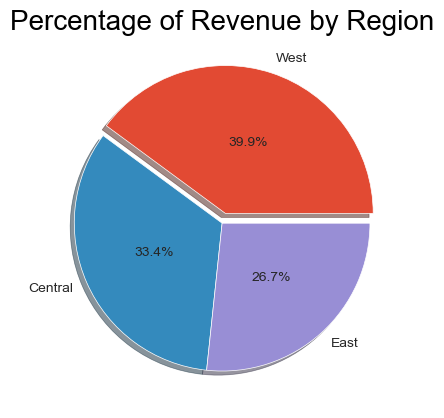

In [148]:
e = [0.07, 0, 0]
df_combined.groupby("regional_office")["revenue"].sum().sort_values(ascending=False).plot(kind="pie", 
                                                                                          autopct="%1.1f%%",
                                                                                          explode=e,
                                                                                          shadow=True,
                                                                                          pctdistance=0.5)
plt.title("Percentage of Revenue by Region",
          color="black",
          fontsize=20)
plt.ylabel("")
print("The West region has the highest percentage of revenue!")

Now I will look at sales by manager.

###### Sales by manager

In [149]:
df_combined.groupby(["manager", "regional_office"])["revenue"].sum().sort_values(ascending=False).reset_index()

,manager,regional_office,revenue
0,Summer Sewald,West,3348224.04
1,Dustin Brinkmann,Central,2650522.83
2,Celia Rouche,West,2638097.18
3,Melvin Marxen,Central,2365197.69
4,Rocco Neubert,East,2262633.13
5,Cara Losch,East,1739327.03


The data indicates that Summer Sewald, from the West regional office, has the highest revenue in sales.

I will visualize these findings with a bar graph.

The bar graph represents the highest sales by manager.


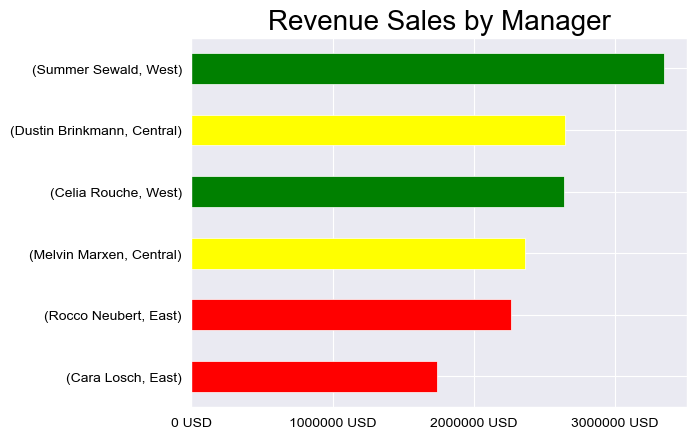

In [150]:
c = ["red", "red", "yellow", "green", "yellow", "green"]
df_combined.groupby(["manager", "regional_office"])["revenue"].sum().sort_values(ascending=True).plot(kind="barh", color=c)
plt.title("Revenue Sales by Manager",
          color="black",
          fontsize=20)
plt.ylabel("")
plt.yticks(color="black")
rev = list(range(0, 4000000, 1000000))
plt.xticks(rev, [f"{r} USD" for r in rev],
           color="black")
print("The bar graph represents the highest sales by manager.")

 2) Are any sales agents lagging behind?

 I will look at the bottom 10 sales by sales agent.

In [151]:
df_combined.groupby(["sales_agent", "manager", "regional_office"])["revenue"].sum().sort_values(ascending=True)[:10].reset_index()

,sales_agent,manager,regional_office,revenue
0,Wilburn Farren,Cara Losch,East,156063.06
1,Garret Kinder,Cara Losch,East,273585.39
2,Rosalina Dieter,Celia Rouche,West,285821.05
3,Rosie Papadopoulos,Cara Losch,East,293414.02
4,Elease Gluck,Celia Rouche,West,338646.86
5,Cecily Lampkin,Dustin Brinkmann,Central,355913.49
6,Daniell Hammack,Rocco Neubert,East,369798.20
7,Boris Faz,Rocco Neubert,East,383009.50
8,Marty Freudenburg,Melvin Marxen,Central,401491.82
9,Moses Frase,Dustin Brinkmann,Central,406396.55


The data indicates that the sales agent Wilburn Farren, from the East regional office, has the lowest sales.

The bar graph shows that Wilburn Farren, from the East regional office,, has the lowest sales out of all the sales agents!


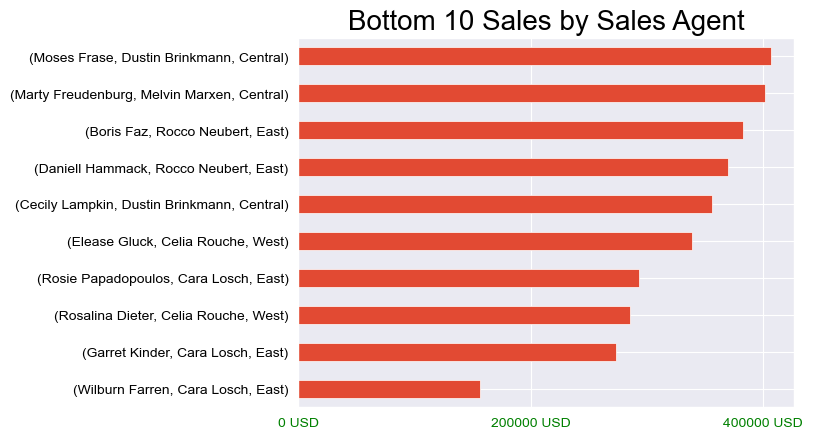

In [152]:
df_combined.groupby(["sales_agent", "manager", "regional_office"])["revenue"].sum().sort_values(ascending=True)[:10].plot(kind="barh")
plt.title("Bottom 10 Sales by Sales Agent",
          color="black",
          fontsize=20)
plt.ylabel("")
plt.yticks(color="black")
rev = list(range(0, 600000, 200000))
plt.xticks(rev, [f"{r} USD" for r in rev], 
           color="green")
print("The bar graph shows that Wilburn Farren, from the East regional office,, has the lowest sales out of all the sales agents!")

3) Can you identify any quarter-over-quarter trends?

To begin, I will first calculate the sum of revenue for each month. Then I will add the sum of months 1, 2 and 3 to get the total revenue for the first quarter and store the results in a variable. Next I will repeat this process with the other months for the next three quarters while storing them in their respective variables. Finally, I will calculate quarter over quarter trends for each quarter.

In [171]:
jan = account_sales_pipeline[account_sales_pipeline["month"] == 1.0].revenue.sum()
feb = account_sales_pipeline[account_sales_pipeline["month"] == 2.0].revenue.sum()
mar = account_sales_pipeline[account_sales_pipeline["month"] == 3.0].revenue.sum()
first_qtr = jan + feb + mar
first_qtr

1601529.88

In [172]:
apr = account_sales_pipeline[account_sales_pipeline["month"] == 4.0].revenue.sum()
may = account_sales_pipeline[account_sales_pipeline["month"] == 5.0].revenue.sum()
jun = account_sales_pipeline[account_sales_pipeline["month"] == 6.0].revenue.sum()
sec_qtr = apr + may + jun
sec_qtr

5137404.6899999995

In [173]:
jul = account_sales_pipeline[account_sales_pipeline["month"] == 7.0].revenue.sum()
aug = account_sales_pipeline[account_sales_pipeline["month"] == 8.0].revenue.sum()
sep = account_sales_pipeline[account_sales_pipeline["month"] == 9.0].revenue.sum()
third_qtr = jul + aug + sep
third_qtr

5104505.279999999

In [174]:
oct = account_sales_pipeline[account_sales_pipeline["month"] == 10.0].revenue.sum()
nov = account_sales_pipeline[account_sales_pipeline["month"] == 11.0].revenue.sum()
dec = account_sales_pipeline[account_sales_pipeline["month"] == 12.0].revenue.sum()
fourth_qtr = oct + nov + dec
fourth_qtr

5069707.63

###### 4th quarter over 3rd quarter growth

In [175]:
((fourth_qtr - third_qtr) / third_qtr)

-0.006817046528747923

###### 3rd quarter over 2nd quarter growth

In [176]:
((third_qtr - sec_qtr) / sec_qtr)

-0.006403896906163363

###### 2nd quarter over 1st quarter growth

In [177]:
((sec_qtr - first_qtr) / first_qtr)

2.207810702851201

4) Do any products have better win rates?

In [227]:
win_rates = sales_pipeline[sales_pipeline["deal_stage"] == "Won"].groupby(["product", "deal_stage"]).agg(products=("product", "unique"), num_of_wins=("deal_stage", "count")).sort_values(by="deal_stage", ascending=False).reset_index()
win_rates[["product", "deal_stage", "num_of_wins"]].sort_values(by="num_of_wins", ascending=False).reset_index()

,index,product,deal_stage,num_of_wins
0,1,GTX Basic,Won,915
1,6,MG Special,Won,793
2,4,GTXPro,Won,729
3,5,MG Advanced,Won,654
4,2,GTX Plus Basic,Won,653
5,3,GTX Plus Pro,Won,479
6,0,GTK 500,Won,15


The product GTX Basic has the best win rate with 915 total wins, while the product GTK 500 has the lowest win rate with 15 total wins.

I will visualize this with a bar graph.

GTX Basic has the highest win rate, while GTK 500 has the lowest win rate.


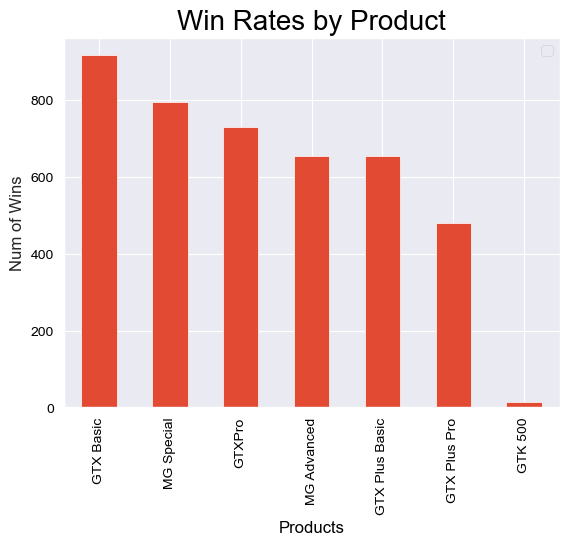

In [239]:
win_rates[["product", "deal_stage", "num_of_wins"]].sort_values(by="num_of_wins", ascending=False).plot(kind="bar")
plt.title("Win Rates by Product",
          color="black",
          fontsize=20)
plt.legend("")
wins = list(range(0,1000,200))
plt.yticks(wins, [f"{w}" for w in wins],
           color="black")
plt.ylabel("Num of Wins")
plt.xticks([0,1,2,3,4,5,6],
           ["GTX Basic","MG Special","GTXPro", "MG Advanced","GTX Plus Basic","GTX Plus Pro","GTK 500"],
           color="black")
plt.xlabel("Products",
           color="black")
print("GTX Basic has the highest win rate, while GTK 500 has the lowest win rate.")

I have reached the conclusion of my analysis. In this project I have demonstrated how to utilize Python to load multiple csv files into a pandas dataframe. I then demonstrated how to clean those dataframes by checking for duplicate values and null values. I then demonstrated how to use the pandas library to convert date values into the correct dtype before extracting the month value from that column. I then demonstrated how to utilize the merge function to join multiple dataframes to answer the desired questions for this project. Lastly, I demonstrated how to utilize the matplotlib library to build and deploy graphs and charts related to the questions that were answered. 